<a href="https://colab.research.google.com/github/Ms-Gichuhi/Foot-ball-regression-analysis/blob/master/Week6_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Define The Question
We have been recruited as a football analyst in a company (Mchezopesa Ltd.) to accomplish the task below.


Provided two datasets containing football results and ranking data.

 A prediction result of a game between home team and away team, and on whether or not the game is friendly (include rank in your training).

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

Approach 1 : Polynomial Approach

What to train given:

Rank of home team

Rank of away team

Tournament type

Model 1: Predict how many goals the home team scores

Model 2: Predict how many goals the away team scores

Approach 2 : Logistic Approach

Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

# Metrics of success
>build a polynomial regression model that predicts how many goals the home team scores.

>build a polynomial regression model that predicts how many goals the away team scores.

> build a logistic model that can predict who wins, loses or draws in a match with a high level of accuracy.

##Experimental design
Read and explore the given dataset.

Define the appropriateness of the available data to answer the given question.

Find and deal with outliers, anomalies, and missing data within the dataset.

Perform univariate, bivariate analysis and record observations

Check for multicollinearity

build the polynoimial and logistic regression models

Create residual plots for your models, and assess heteroskedasticity using Barlett's test.

Challenge your solution by providing insights on how you can make improvements in model improvement.

In [1]:
# Importing the required libraries
# ---
#
import pandas as pd
import numpy as np

In [2]:
#loading the dataset
fifa = pd.read_csv("fifa_ranking.csv")

results = pd.read_csv("results.csv")

In [3]:
#previewing our fifa datasets

fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [4]:
#previewing the results dataset

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
#checking for missing values
print(fifa.isnull().sum())


rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64


# Performing your EDA and  feature engineering 

In [6]:
#checking for duplicates
print(fifa.duplicated().sum())

37


In [7]:
#Drop the duplicates 

fifa.drop_duplicates(keep='first', inplace = True)

In [8]:
fifa.shape

(57756, 16)

In [9]:
# properties of the fifa dataset
fifa.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000
mean,101.618118,121.971151,332.339965,-0.009938,61.751362,61.751362,60.953507,30.476830,59.734768,17.920469,59.114466,11.822922
std,58.635096,260.479191,302.964176,5.802788,138.042006,138.042006,137.712945,68.856514,136.319119,40.895761,135.540135,27.108034
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,91.500000,525.000000,1.000000,30.447500,30.447500,26.400000,13.200000,21.250000,6.380000,20.795000,4.162500
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [10]:
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [11]:
#selecting columns we will use
fifa_df = fifa[['rank', 'country_full', 'rank_date']]
fifa_df.head()

,rank,country_full,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08


In [12]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57756 entries, 0 to 57792
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rank          57756 non-null  int64 
 1   country_full  57756 non-null  object
 2   rank_date     57756 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.8+ MB


In [13]:
fifa_df['rank_date'] = pd.to_datetime(fifa_df['rank_date'])
fifa_df['rank_date']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       1993-08-08
1       1993-08-08
2       1993-08-08
3       1993-08-08
4       1993-08-08
           ...    
57788   2018-06-07
57789   2018-06-07
57790   2018-06-07
57791   2018-06-07
57792   2018-06-07
Name: rank_date, Length: 57756, dtype: datetime64[ns]

In [14]:
#renaming the country and date column to match the results datset for easier merging
fifa_df.columns = ['rank', 'country', 'date']
fifa_df.head()

,rank,country,date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08


In [15]:
fifa_df.columns

Index(['rank', 'country', 'date'], dtype='object')

In [16]:
#cleaning up the results dataset for merging
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [17]:
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [18]:
#selecting columns we will use
results= results[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'country']]
results.head()

,date,home_team,away_team,home_score,away_score,tournament,country
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,England
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,England
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland


In [19]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country'],
      dtype='object')

In [20]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   country     40839 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.2+ MB


In [21]:
#changing the date to datetime
results['date'] = pd.to_datetime(results['date'])
results['date']

0       1872-11-30
1       1873-03-08
2       1874-03-07
3       1875-03-06
4       1876-03-04
           ...    
40834   2019-07-18
40835   2019-07-18
40836   2019-07-19
40837   2019-07-19
40838   2019-07-20
Name: date, Length: 40839, dtype: datetime64[ns]

In [22]:
print(results['date'].describe())

print("................................................")
print(fifa_df['date'].describe())

count                   40839
unique                  15115
top       2012-02-29 00:00:00
freq                       66
first     1872-11-30 00:00:00
last      2019-07-20 00:00:00
Name: date, dtype: object
................................................
count                   57756
unique                    286
top       2017-04-06 00:00:00
freq                      211
first     1993-08-08 00:00:00
last      2018-06-07 00:00:00
Name: date, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


In [23]:
#dropping date before 1993 in the result dataframe since they do not have corresponding records in the fifa dataframe.
results_df = results[results["date"] > '1993-01-01']
results_df.shape


(23477, 7)

# **merging the datasets**

In [24]:
# Separate the date column into Year- Month of the fifa_ranking dataset
fifa_df['year'] = pd.to_datetime(fifa_df['date']).dt.to_period('M')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
#calling out the year column in our fifa dataset for our final dataset
fifa_df.head()

,rank,country,date,year
0,1,Germany,1993-08-08,1993-08
1,2,Italy,1993-08-08,1993-08
2,3,Switzerland,1993-08-08,1993-08
3,4,Sweden,1993-08-08,1993-08
4,5,Argentina,1993-08-08,1993-08


In [26]:
# Separate the date column into Year- Month of the fifa_ranking dataset
results_df['year'] = pd.to_datetime(results_df['date']).dt.to_period('M')
results_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,home_team,away_team,home_score,away_score,tournament,country,year
17362,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,1993-01
17363,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,1993-01
17364,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Gabon,1993-01
17365,1993-01-03,Gabon,Ghana,2,3,Friendly,Gabon,1993-01
17366,1993-01-08,Uganda,Tanzania,3,1,Friendly,Uganda,1993-01


In [27]:
# Merging the two datasets to obtain the hometeam  dataset 
home_df = pd.merge(fifa_df, results_df, how = 'inner', left_on = ['year','country'], right_on = ['year','home_team'])
home_df.head()

,rank,country_x,date_x,year,date_y,home_team,away_team,home_score,away_score,tournament,country_y
0,4,Sweden,1993-08-08,1993-08,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden
1,4,Sweden,1993-08-08,1993-08,1993-08-22,Sweden,France,1,1,FIFA World Cup qualification,Sweden
2,5,Argentina,1993-08-08,1993-08,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina
3,5,Argentina,1993-08-08,1993-08,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina
4,8,Brazil,1993-08-08,1993-08,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil


In [28]:
#from the merge above the country column matches the home team, we will drop the country_y  and rename country_x to country
#we will also rename the rank to hometeam rank
home_df['rank'] = home_df.rename({'rank': 'home_rank'}, axis = 1, inplace = True)

In [29]:
home_df['country_x'] = home_df.rename({'country_x': 'country'}, axis = 1, inplace = True)

In [30]:
home_df.drop(columns=['country_y'], inplace=True)

In [31]:
home_df.head()

,home_rank,country,date_x,year,date_y,home_team,away_team,home_score,away_score,tournament,rank,country_x
0,4,Sweden,1993-08-08,1993-08,1993-08-11,Sweden,Switzerland,1,2,Friendly,None,None
1,4,Sweden,1993-08-08,1993-08,1993-08-22,Sweden,France,1,1,FIFA World Cup qualification,None,None
2,5,Argentina,1993-08-08,1993-08,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,None,None
3,5,Argentina,1993-08-08,1993-08,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,None,None
4,8,Brazil,1993-08-08,1993-08,1993-08-08,Brazil,Mexico,1,1,Friendly,None,None


In [32]:
#picking out the columns we need from thr hometeam df
home_df= home_df[['home_rank', 'year', 'home_team', 'away_team', 'home_score', 'away_score']]
home_df.head()

,home_rank,year,home_team,away_team,home_score,away_score
0,4,1993-08,Sweden,Switzerland,1,2
1,4,1993-08,Sweden,France,1,1
2,5,1993-08,Argentina,Peru,2,1
3,5,1993-08,Argentina,Paraguay,0,0
4,8,1993-08,Brazil,Mexico,1,1


In [33]:
# Merging the two datasets to obtain the awayteam  dataset 
away_df = pd.merge(fifa_df, results_df, how = 'inner', left_on = ['year','country'], right_on = ['year','away_team'])
away_df.head()

,rank,country_x,date_x,year,date_y,home_team,away_team,home_score,away_score,tournament,country_y
0,3,Switzerland,1993-08-08,1993-08,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden
1,5,Argentina,1993-08-08,1993-08,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru
2,5,Argentina,1993-08-08,1993-08,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay
3,5,Argentina,1993-08-08,1993-08,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia
4,8,Brazil,1993-08-08,1993-08,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela


In [34]:
#from the merge above the country column matches the away team, we will drop the country_y  and rename country_x to country
#we will also rename the rank to awayteam rank
away_df['rank'] = away_df.rename({'rank': 'away_rank'}, axis = 1, inplace = True)

In [35]:
away_df['country_x'] = away_df.rename({'country_x': 'country'}, axis = 1, inplace = True)

In [36]:
away_df.drop(columns=['country_y'], inplace=True)

In [37]:
away_df.head()

,away_rank,country,date_x,year,date_y,home_team,away_team,home_score,away_score,tournament,rank,country_x
0,3,Switzerland,1993-08-08,1993-08,1993-08-11,Sweden,Switzerland,1,2,Friendly,None,None
1,5,Argentina,1993-08-08,1993-08,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,None,None
2,5,Argentina,1993-08-08,1993-08,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,None,None
3,5,Argentina,1993-08-08,1993-08,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,None,None
4,8,Brazil,1993-08-08,1993-08,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,None,None


In [38]:
#picking out the columns we need from thr awayteam df
away_df= away_df[['away_rank', 'year', 'away_team', 'home_team', 'away_score', 'tournament', 'home_score']]
away_df.head()

,away_rank,year,away_team,home_team,away_score,tournament,home_score
0,3,1993-08,Switzerland,Sweden,2,Friendly,1
1,5,1993-08,Argentina,Peru,1,FIFA World Cup qualification,0
2,5,1993-08,Argentina,Paraguay,3,FIFA World Cup qualification,1
3,5,1993-08,Argentina,Colombia,1,FIFA World Cup qualification,2
4,8,1993-08,Brazil,Venezuela,5,FIFA World Cup qualification,1


In [39]:
away_df.shape

(18502, 7)

In [40]:
home_df.shape

(18593, 6)

In [41]:
#now merging the hometeam and awayteams dataset
df = pd.merge(home_df, away_df)
df.head()

,home_rank,year,home_team,away_team,home_score,away_score,away_rank,tournament
0,4,1993-08,Sweden,Switzerland,1,2,3,Friendly
1,4,1993-08,Sweden,France,1,1,12,FIFA World Cup qualification
2,5,1993-08,Argentina,Peru,2,1,70,FIFA World Cup qualification
3,5,1993-08,Argentina,Paraguay,0,0,67,FIFA World Cup qualification
4,8,1993-08,Brazil,Mexico,1,1,14,Friendly


In [42]:
df.dtypes

home_rank         int64
year          period[M]
home_team        object
away_team        object
home_score        int64
away_score        int64
away_rank         int64
tournament       object
dtype: object

In [43]:
df['status'] = df.home_score - df.away_score
def status(x):
    if x > 0:
        return 'Win'
    elif x < 0:
        return 'Loss'
    else:
        return 'Draw'
      
df['status'] = df.status.apply(lambda y: status(y))
df.tail()

#we created a new column for trhe status of the hometeam ,was it a win ,loss or draw?
#it is the difference btetween home scores and away scores

,home_rank,year,home_team,away_team,home_score,away_score,away_rank,tournament,status
16989,137,2018-06,Angola,Malawi,0,0,123,COSAFA Cup,Draw
16990,139,2018-06,Botswana,Mauritius,6,0,155,COSAFA Cup,Win
16991,147,2018-06,Lesotho,Zimbabwe,0,0,118,COSAFA Cup,Draw
16992,160,2018-06,Barbados,Belize,0,0,163,Friendly,Draw
16993,184,2018-06,Malta,Georgia,0,1,96,Friendly,Loss


In [44]:
#df['tournament'].value_counts()
# we will specify the Tournament type (World cup, Friendly, Other)
def tournament(class_type):
    if class_type == 'Friendly':
        return 'Friendly'
    elif class_type == 'FIFA World Cup':
        return 'World cup'
    else:
        return 'Other'
df['tournament'] = df.tournament.apply(lambda x: tournament(x))

In [45]:
df['tournament'].value_counts()

Other        10335
Friendly      6496
World cup      163
Name: tournament, dtype: int64

In [46]:
#more cleaning procedures after merging
df.isnull().sum()

home_rank     0
year          0
home_team     0
away_team     0
home_score    0
away_score    0
away_rank     0
tournament    0
status        0
dtype: int64

In [47]:
#checking for duplicates
print(df.duplicated().sum())

#the duplicates are very many after merging and cant be ignored

132


In [48]:
#Drop the duplicates 

df.drop_duplicates(inplace = True)

In [49]:
#checking the shape of our new dataset
df.shape

(16862, 9)

In [50]:
df['tournament'].value_counts()

Other        10291
Friendly      6408
World cup      163
Name: tournament, dtype: int64

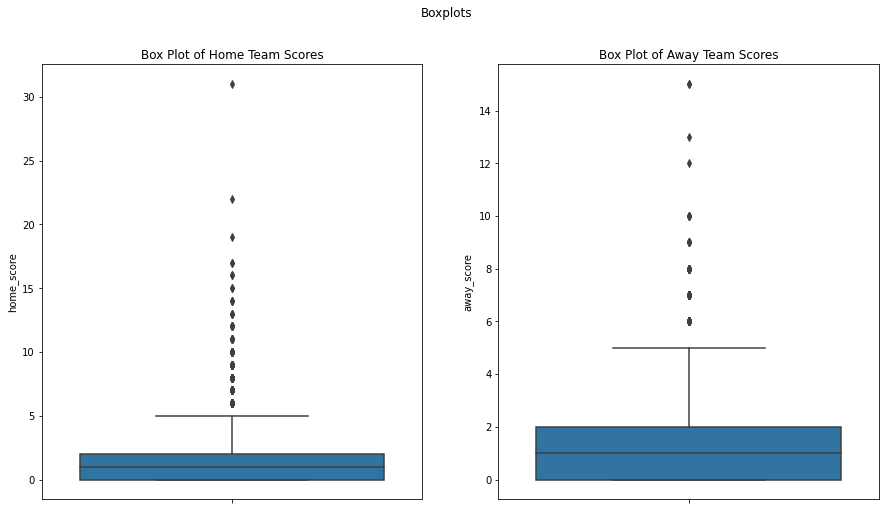

In [51]:
# Checking for outliers using
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2, figsize=(15,8))
fig.suptitle('Boxplots')
sns.boxplot(data=df, y = "home_score", ax=ax[0])
ax[0].set_title('Box Plot of Home Team Scores')
sns.boxplot(data=df, y = "away_score", ax=ax[1])
ax[1].set_title('Box Plot of Away Team Scores')

plt.show()

we will not remove the outliers since they may not affect anything for our project, also we assume they are normal

In [52]:
df.to_csv('fifa_result.csv')

### Performing EDA

In [53]:
#univariate analysis
df.describe()

,home_rank,home_score,away_score,away_rank
count,16862.000000,16862.000000,16862.000000,16862.000000
mean,76.023248,1.604673,1.069624,78.853042
std,50.852071,1.616018,1.245983,52.005515
min,1.000000,0.000000,0.000000,1.000000
25%,33.000000,0.000000,0.000000,35.000000
50%,70.000000,1.000000,1.000000,72.000000
75%,112.000000,2.000000,2.000000,115.000000
max,209.000000,31.000000,15.000000,209.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


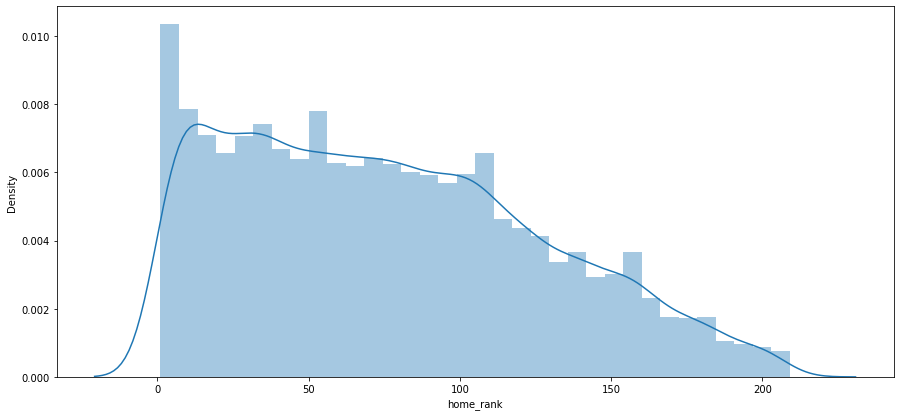

In [54]:
#visualizing home scores
fig = plt.figure(figsize=(15,15))
fig.add_subplot(2,1,1)
sns.distplot(df['home_rank'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


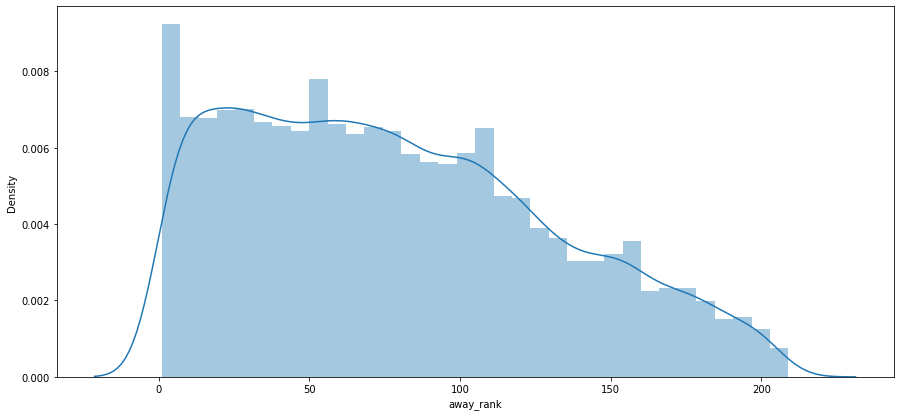

In [55]:
#visualizing home scores
fig = plt.figure(figsize=(15,15))
fig.add_subplot(2,1,1)
sns.distplot(df['away_rank'])

In [56]:
df.columns

Index(['home_rank', 'year', 'home_team', 'away_team', 'home_score',
       'away_score', 'away_rank', 'tournament', 'status'],
      dtype='object')

In [57]:
df[['home_rank', 'home_team', 'away_team', 'home_score',
       'away_score', 'away_rank', 'tournament', 'status']].skew()

home_rank     0.448408
home_score    2.326092
away_score    1.927332
away_rank     0.447984
dtype: float64

All of the variables are positively skewed.


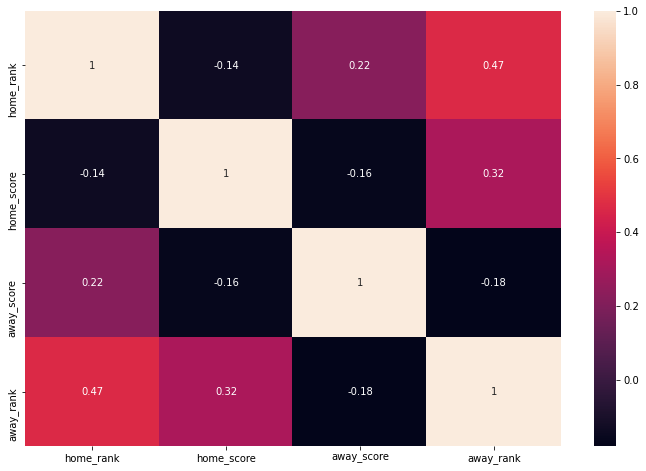

In [58]:
#bivariate analysisi
fig = plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [59]:
#plotting bivariate summaries


# **Check of multicollinearity**

In [60]:
df.columns

Index(['home_rank', 'year', 'home_team', 'away_team', 'home_score',
       'away_score', 'away_rank', 'tournament', 'status'],
      dtype='object')

In [61]:

#to focus on our independent variables only.
independent_only = df[['home_rank', 'home_score', 'away_score', 'away_rank']] 

#displaying the correlations between the variables
correlations = independent_only.corr()

correlations

,home_rank,home_score,away_score,away_rank
home_rank,1.000000,-0.135345,0.221738,0.469376
home_score,-0.135345,1.000000,-0.163737,0.318861
away_score,0.221738,-0.163737,1.000000,-0.179911
away_rank,0.469376,0.318861,-0.179911,1.000000


In [62]:
#calculating the VIF from the correlation above
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

# If VIF = 1, a variable  is not correlated with any other independent variable. 
#As a rule of thumb, multicollinearity is a potential problem when VIF is greater than 4; and,
# a serious problem when it is greater than 10. The output above shows a VIF of:
# home-rank = 1.54,away_rank = 1.68,home_score = 1.27, away_score = 1.17
# which indicates some multicollinearity,not too much so we do nothing about it.

,home_rank,home_score,away_score,away_rank
home_rank,1.635200,0.463563,-0.466461,-0.999256
home_score,0.463563,1.259276,-0.008253,-0.620604
away_score,-0.466461,-0.008253,1.180144,0.433898
away_rank,-0.999256,-0.620604,0.433898,1.744976


# **Building the model**

# **polynomial approach**


> What to train given:

Rank of home team

Rank of away team

Tournament type

Model 1: Predict how many goals the home team scores.



In [63]:
# encoding the tournament column with numeric codes

# import labelencoder
from sklearn.preprocessing import LabelEncoder

# apply label encoder to appropriate column

le = LabelEncoder()
df['tournament'] = le.fit_transform(df['tournament'])

In [64]:
#predicting the home scores
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [65]:
#setting our dependent and independent variables
x = (df[['home_rank', 'away_rank', 'tournament']])
y = df['home_score']

print(x.shape)
print(y.shape)

(16862, 3)
(16862,)


In [66]:
# splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 13, test_size = 0.2)


# scaling the train and test sets
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# fitting the polynomial regression to the dataset
poly_features = PolynomialFeatures(degree = 1,include_bias = False)
x_train = poly_features.fit_transform(x_train)
x_test = poly_features.fit_transform(x_test)

# training the model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# making predictions
y_pred = regressor.predict(x_test)

In [67]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut

In [68]:
#calculating rsmes
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 1.4182483817956948


cross validating

In [69]:
#setting our dependent and independent variables
x = (df[['home_rank', 'away_rank', 'tournament']]).values
y = df['home_score'].values
# define the k-fold cross validation method
folds = LeaveOneOut()

#assess cross validation model
RMSES = []
count = 0
for train_index, test_index in folds.split(x):
  # set up train and test based on split determined by k-fold
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # fitting the polynomial regression model
  poly_regressor = PolynomialFeatures(degree = 1)    
  x_reg = poly_regressor.fit_transform(x_train)      

  #applying polynomial feature to linear regression
  pol_reg = LinearRegression()                          
  pol_reg.fit(x_reg, y_train)

  # making predictions
  y_pred = pol_reg.predict(poly_regressor.fit_transform(x_test))

  # assessing the accuracy of the model
  rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append (rmse_value)

  count = count + 1

print('Trained '+str(count) + ' models')
print('The mean of the RMSES is: ' + str (np.mean(RMSES)))

Trained 16862 models
The mean of the RMSES is: 1.048763843749294


the rsmes after crossvalidating our model improved abit as it decreases. 

In [70]:
# Create the residuals
residuals = np.subtract(y_pred, y_test)

# previewing the residuals

pd.DataFrame(residuals).describe()

,0
count,1.000000
mean,0.520509
std,NaN
min,0.520509
25%,0.520509
50%,0.520509
75%,0.520509
max,0.520509


In [71]:
#performing the Heteroskedasticity test
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)


degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)
print(test_result)


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


nan
nan
the variances are homogeneous!


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: divide by zero encountered in double_scalars
  1.0/(Ntot - k))
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: invalid value encountered in double_scalars
  1.0/(Ntot - k))


Model 2: Predict how many goals the away team scores.

In [72]:
#defining our depenndent and indepent variables
X = (df[['home_rank', 'away_rank', 'tournament']])
y = df['away_score']
print(X.shape)
print(y.shape)

(16862, 3)
(16862,)


In [73]:
# splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 13, test_size = 0.2)


# scaling the train and test sets
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# fitting the polynomial regression to the dataset
poly_features = PolynomialFeatures(degree = 1,include_bias = False)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# training the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# making predictions
y_pred = regressor.predict(X_test)

In [74]:
#calculating rsmes
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 1.2032558696353046


cross validating our model using k-fold

In [75]:
#setting our dependent and independent variables
X = (df[['home_rank', 'away_rank', 'tournament']]).values
y = df['away_score'].values
# define the k-fold cross validation method
folds = LeaveOneOut()

#assess cross validation model
RMSES = []
count = 0
for train_index, test_index in folds.split(x):
  # set up train and test based on split determined by k-fold
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # fitting the polynomial regression model
  poly_regressor = PolynomialFeatures(degree = 1)    
  X_reg = poly_regressor.fit_transform(X_train)      

  #applying polynomial feature to linear regression
  pol_reg = LinearRegression()                          
  pol_reg.fit(X_reg, y_train)

  # making predictions
  y_pred = pol_reg.predict(poly_regressor.fit_transform(X_test))

  # assessing the accuracy of the model
  rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append (rmse_value)

  count = count + 1

print('Trained '+str(count) + ' models')
print('The mean of the RMSES is: ' + str (np.mean(RMSES)))
  


Trained 16862 models
The mean of the RMSES is: 0.8524261613245147


In [76]:
# Calculating the residuals
residuals = np.subtract(y_pred, y_test)

# previewing the residuals

pd.DataFrame(residuals).describe()

,0
count,1.000000
mean,0.904093
std,NaN
min,0.904093
25%,0.904093
50%,0.904093
75%,0.904093
max,0.904093


In [77]:
#performing the Heteroskedasticity test
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)


degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)
print(test_result)


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

nan
nan
the variances are homogeneous!


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: divide by zero encountered in double_scalars
  1.0/(Ntot - k))
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: invalid value encountered in double_scalars
  1.0/(Ntot - k))


the rsmes quite improved for this model afyter crossvalidating.

# logistic approach



> Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)



In [78]:
df.head()

,home_rank,year,home_team,away_team,home_score,away_score,away_rank,tournament,status
0,4,1993-08,Sweden,Switzerland,1,2,3,0,Loss
1,4,1993-08,Sweden,France,1,1,12,1,Draw
2,5,1993-08,Argentina,Peru,2,1,70,1,Win
3,5,1993-08,Argentina,Paraguay,0,0,67,1,Draw
4,8,1993-08,Brazil,Mexico,1,1,14,0,Draw


In [79]:
#predicting the home team status: win,loss or draw
X= (df[['home_score', 'home_rank', 'tournament']])
Y = df['status']

print(X.shape)
print(Y.shape)

(16862, 3)
(16862,)


In [80]:
#splitting into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [81]:
# Fitting our model

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
# Using our model to make a prediction

y_pred = LogReg.predict(X_test)

In [83]:
# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)
# Measuring the accuracy of the model

from sklearn.metrics import accuracy_score
print("accuracy of the model is", {accuracy_score(Y_test, y_pred)})

[[ 355  596  280]
 [ 238 1030  152]
 [ 323  136 1949]]
accuracy of the model is {0.6590235224352639}


from the above accuracy level of 65%, we have several incorrect prediction and therefore we may need to do hyperparameter tuning to see of the model improves.

In [84]:
#predicting the home team status: win,loss or draw
X= (df[['home_score', 'home_rank', 'tournament']])
Y = df['status']

In [85]:
# Performing Data Preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [86]:
# Training and Cross Validation

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [87]:
#cross validating and training
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [88]:
# Printing the accuracies returned for five folds 
# by the cross_val_score method by calling print on all_accuracies

print(all_accuracies.mean())

0.6316625328013228


In [89]:
#Hyperparameters: Getting Started with Grid Search
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [90]:
#Instantiating GridSearchCV object
from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [91]:
#Calling the fit method
gd_sr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [92]:
# Checking the parameters that return the highest accuracy

best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 500}


In [93]:
# Step 5: Finding the obtained accuracy

best_result = gd_sr.best_score_
print(best_result)

0.6321373412290943


## challenging the solution:

though the models used did quite some good job, the accuracies are may not yield the best results and therefore  we recomend applying other models to train and make more inferences.